In [3]:
import tensorflow as tf

# Check tensorflow version and GPU avainability
print("TensorFlow Version:", tf.__version__)
print("GPUs Available:", tf.config.list_physical_devices('GPU'))

TensorFlow Version: 2.10.0
GPUs Available: []


In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
    try:
        tf.config.set_logical_device_configuration(
            gpus[0],
            [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

In [44]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
        print(e)

In [2]:
from tensorflow.compat.v1.keras.backend import set_session

In [3]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.visible_device_list = "0"
set_session(tf.compat.v1.Session(config=config))

In [6]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

AttributeError: module 'tensorflow' has no attribute 'Session'

In [6]:
import tensorflow as tf

my_device = tf.device("/cpu:0")

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [6]:
df = pd.read_csv('C:/Users/team1/Documents/GitHub/CNN_Movie-Classification/movie_dataset/train.csv')

In [10]:
df = df.head(2000)

In [7]:
df.shape

(7254, 27)

---
#### Using GPU Tensor

In [8]:
# Assuming df is your DataFrame with image IDs

width = 350
height = 350
X = []

for i in range(df.shape[0]):
    path = 'movie_dataset/Images/'+df['Id'][i]+'.jpg'
    img = image.load_img(path, target_size=(width, height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X).astype('float32')
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()

# Convert numpy arrays to TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X, y))

# Shuffle and batch the dataset
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(32)  # Use a buffer size that fits your memory

---

In [6]:
from tensorflow.keras.preprocessing import image

width = 350
height = 350
X = []
for i in tqdm(range(df.shape[0])):
    path = 'movie_dataset/Images/'+df['Id'][i]+'.jpg'
    img = image.load_img(path, target_size=(width, height, 3))  # Correct usage
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:14<00:00, 489.83it/s]


In [9]:
X.shape

(7254, 350, 350, 3)

In [10]:
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(7254, 25)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 348, 348, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 174, 174, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 172, 172, 32)     1

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
# import gc

In [16]:
# gc.collect()

1103

In [15]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test), batch_size=32)

Epoch 1/10
182/182 [==============================] - 77s 417ms/step - loss: 0.5758 - accuracy: 0.1770 - val_loss: 2.0133 - val_accuracy: 0.1799
Epoch 2/10
182/182 [==============================] - 75s 414ms/step - loss: 0.2645 - accuracy: 0.3052 - val_loss: 1.2567 - val_accuracy: 0.1558
Epoch 3/10
182/182 [==============================] - 74s 405ms/step - loss: 0.2404 - accuracy: 0.3186 - val_loss: 0.5848 - val_accuracy: 0.1840
Epoch 4/10
182/182 [==============================] - 74s 406ms/step - loss: 0.2260 - accuracy: 0.3462 - val_loss: 0.4476 - val_accuracy: 0.2130
Epoch 5/10
182/182 [==============================] - 74s 405ms/step - loss: 0.2117 - accuracy: 0.3688 - val_loss: 0.5594 - val_accuracy: 0.2467
Epoch 6/10
182/182 [==============================] - 74s 409ms/step - loss: 0.1957 - accuracy: 0.3915 - val_loss: 0.5022 - val_accuracy: 0.2543
Epoch 7/10
182/182 [==============================] - 74s 407ms/step - loss: 0.1868 - accuracy: 0.4074 - val_loss: 0.5336 - val_ac

In [18]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

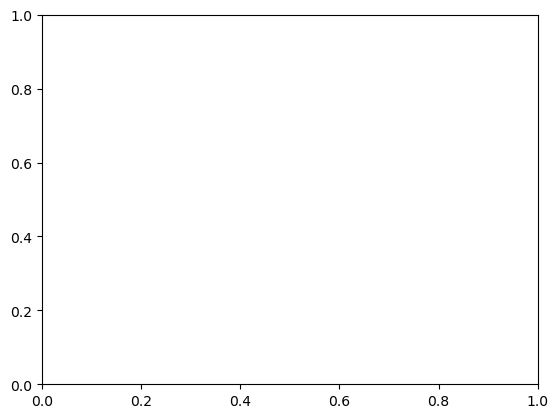

In [19]:
plotLearningCurve(history,5)

In [29]:
model.save('C:/Users/team1/Desktop/CNN_Movie-Classification/gpu_movie.h5')

In [20]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.3996691405773163
Test accuracy:  0.23983459174633026


1/1 [==============================] - 0s 101ms/step
Drama
Romance
War


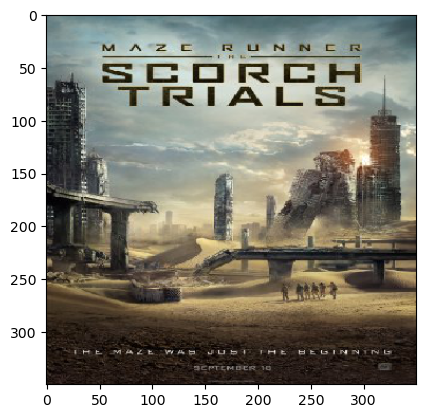

In [21]:
img = image.load_img('movie_dataset/Images/tt4046784.jpg',target_size=(350,350,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,350,350,3)
classes = df.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
    print(classes[top3[i]])

In [41]:
df[df['Id'] == 'tt4046784']

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
